## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
random.seed(42)    #### setting the seed to assure that we get the same answers on quizzes as we set up
import statsmodels.api as sm
from scipy.stats import norm

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# reading the data
df = pd.read_csv('ab_data.csv')

# let's take a look at the top five rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# using shape() function 
nrows = df.shape[0]
print("Number of rows = {}".format(nrows))

Number of rows = 294478


c. The number of unique users in the dataset.

In [4]:
# using nunique() function
nunique_users = df['user_id'].nunique()
print("Number of unique users = {}".format(nunique_users))

Number of unique users = 290584


d. The proportion of users converted.

In [5]:
Converted_users_proportion = (df['converted'].mean())*100
print("proportion of The Converted users = {}%".format(Converted_users_proportion))

proportion of The Converted users = 11.96591935560551%


In [6]:
# solution num2 to find the proportion of users converted 
sum(df['converted'].values)/nrows

# solution num3 to find the proportion of users converted 
(df.iloc[:,:]['converted']==1).value_counts().loc[True]/df.shape[0]


0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
False_line_up=df[((df['group']=='treatment')==(df['landing_page']=='new_page'))==False]
print("Times new_page and treatment don't line up = {}".format(False_line_up.shape[0]))

Times new_page and treatment don't line up = 3893


f. Do any of the rows have missing values?

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [9]:
# solution num2 to find if the rows have missing values
df.isnull().sum().any()

False

In [10]:
# solution num3 to find if the rows have missing values
null_data = df[df.isnull().any(axis=1)]
null_data

,user_id,timestamp,group,landing_page,converted


Great! There is no missing values in our data

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df2=df.drop(False_line_up.index,axis=0)

In [12]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group']=='control') == (df2['landing_page']=='old_page')) == False].shape[0]

0

In [13]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


Our data is now clean and tidy and doesn't contain any duplicates or records with missing or mismatched values.

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [15]:
# using nunique() function
nunique_users = df2['user_id'].nunique()
print("Number of unique users = {}".format(nunique_users))

Number of unique users = 290584


In [16]:
# solution num2 to find unique user ids count
len(df2['user_id'].unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
sum(df2['user_id'].duplicated())

1

In [18]:
# Finding the one user_id repeated in df2
# we know that one user id is repeated due to difference between num of userids and num of unique ids
df2[df2['user_id'].duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [19]:
#investigate details of rows with duplicate user ids
duplicated_id = df2[df2['user_id'].duplicated()]
duplicated_id

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [20]:
# delete duplicate record 
# Remove one of the rows with a duplicate user_id..
df2.drop(index = 2893, axis = 0, inplace = True)

In [21]:
# Check if the row with a duplicate user_id is deleted or not
sum(df2['user_id'].duplicated())

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [22]:
# since values are 1 and 0, we can calculate mean to get probability of an individual converting 
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
df2.query('group == "control"').converted.mean()

0.1203863045004612

#### Thus, given that an individual was in the `control` group, the probability they converted is `0.120386`

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [24]:
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

#### Thus, given that an individual was in the `treatment` group, the probability they converted is `0.118807`

d. What is the probability that an individual received the new page?

In [25]:
(df2.query('landing_page == "new_page"')).shape[0]/df2.shape[0]
#df2.query('landing_page == "new_page"').landing_page.count() / (df2.shape[0])

0.5000619442226688

In [26]:
# solution num2 to find the probability that an individual received the new page 
len(df2.query("group == 'treatment'"))/df2.shape[0]

0.5000619442226688

### What is the probability that an individual received the old page?

In [27]:
df2.query('landing_page == "old_page"').landing_page.count()/ (df2.shape[0])
# len(df2.query("group == 'control'"))/df2.shape[0]

0.4999380557773312

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

### From results a to d, we conclude that :

- The probability of an individual converting regardless of the page is `11.96 %`.

- Given that an individual was in the control group, the probability of converting is`12.04 %`.

- Given that an individual was in the treatment group,the probability of converting is`11.88 %`.

- So the probabilities of converting in the control group and the treatment group are very close to each other , with a     difference of `0.16 %` and this small difference could also appear by chance.

- Moreover, this conclusion is supported by the fact that the probability of an individual receiving the new page or old     page is almost the same, since the probability of receiving the new page is `50.01 %` and the old page is `49.99 %`

So, We don't have sufficient evidence to say that the new treatment page leads to more conversions than the old page.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Our Hypothes is here is:**
- $H_{0}$ : $p_{old}$  >=  $p_{new}$
- $H_{1}$ : $p_{old}$  <  $p_{new}$

$p_{new}$ and $p_{old}$ are the population conversion rates for the old and new pages, respectivley.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [28]:
p_new = df2['converted'].mean()
print("The convert rate for 𝑝_𝑛𝑒𝑤  under the null = {}".format(p_new))

The convert rate for 𝑝_𝑛𝑒𝑤  under the null = 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [29]:
p_old = df2['converted'].mean()
print("The convert rate for 𝑝_𝑜𝑙𝑑  under the null = {}".format(p_old))

The convert rate for 𝑝_𝑜𝑙𝑑  under the null = 0.11959708724499628


c. What is $n_{new}$?

In [30]:
n_new = len(df2.query("group == 'treatment'"))
print("n_new = {}".format(n_new))

n_new = 145310


d. What is $n_{old}$?

In [31]:
n_old = len(df2.query("group == 'control'"))
print("n_old = {}".format(n_old))

n_old = 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [32]:
new_page_converted = np.random.binomial(n_new, p_new)
new_page_converted

17551

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [33]:
old_page_converted = np.random.binomial(n_old, p_old)
old_page_converted

17360

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [34]:
p_diff = (new_page_converted/n_new) - (old_page_converted/n_old)
p_diff

0.0012848259597910971

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [35]:
# Sampling distribution 
p_diffs = []
new_converted_page = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_page = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_page - old_converted_page

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

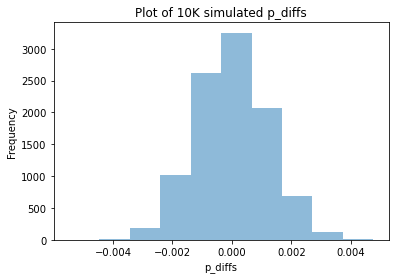

In [36]:
plt.hist(p_diffs,alpha=0.5)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Plot of 10K simulated p_diffs');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:
# calculating the actual difference observed between conversion rates for old and new pages 
obs_dif = df[df['group'] == 'treatment']['converted'].mean() -  df[df['group'] == 'control']['converted'].mean()
obs_dif 

-0.0014795997940775518

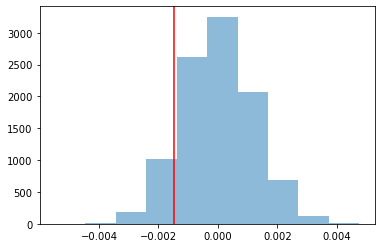

In [38]:
# plotting p_diffs distribution
plt.hist(p_diffs,alpha=0.5)

# plotting the line for the observed difference between conversion rates for new and old pages
plt.axvline(x=obs_dif,  c='red');

In [39]:
# p-value
(p_diffs > obs_dif).mean()

0.89

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- In part j we computed p-value >>> `0.88`
- As explained in this course, the p-value is defined as the probability of observing our statistic (proportion of p_diffs greater than the observed difference here) as one or more extreme than the sample statistic in favor of the alternate if the null hypothesis is true.
- As the negligible difference of `-0.0014` between the conversion rates for old and new pages so the p-value tells us it is significant and not just a random result.
- Lower p-values suggest that our sample statistic was not likely to come from the null; therefore, we reject the null hypothesis in this case. Whereas, higher p-values suggest that our sample statistic was likely to come from the null and therefore we do not reject the null hypothesis in this case.
- As the p-value here is equal to `0.88` so we fail to reject the null hypothesis at `5%` level of significance.
- So there is no conversion advantage with new pages and the null hypothesis is true as old and new pages perform almost similarly.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [40]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = sum(df2.query('landing_page == "old_page"')['converted'])

# number of conversions with the new_page
convert_new = sum(df2.query('landing_page == "new_page"')['converted'])

# number of individuals who were shown the old_page
n_old = len(df2.query('landing_page == "old_page"'))

# number of individuals who received new_page
n_new = len(df2.query('landing_page == "new_page"'))

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [41]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

In [42]:
# calculating critical z-score
norm.ppf(1-(0.05))

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

### As per the above Z-Score :
- We find that the calculated z-score of `-1.31`  is smaller than the critical value of `1.64` so we also fail to reject the null null hypothesis again.
- The p-value computed here is also `0.9` which is greater than the `5%` level of significance implicating the failure of   
  rejecting null hypothesis.
- As regards the conversion rates of the old and new pages, we find that old pages are only minutely better than new pages. 
- These values agree with the findings in parts j. and k. through sampling distribution of the difference between conversion rates with bootstrapping.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [43]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [44]:
# adding intercept
df2['intercept']=1
# creating the dummies
df2[['control', 'ab_page']] = pd.get_dummies(df['group'])
df2.drop('control', axis = 1, inplace = True)
# confirming Changes
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [45]:
# loading, Fitting our Linear Model and Obtaining the Results
y=df2['converted']
x=df2[['intercept','ab_page']]
log_mod = sm.Logit(y,x)
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:               8.077e-06
Time:                        05:09:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

- Our hypothesis here is:
- $H_{0}$ : $p_{new}$ - $p_{old}$  = 0
- $H_{1}$ : $p_{new}$ - $p_{old}$  != 0

$p_{new}$ and $p_{old}$ are the population conversion rates for the old and new pages, respectivley.

- Based on the P - value  we can say that the conversion is not significant dependent on the page . 
- The p-value associated with ab_page is 0.19 which is diffrent from the value we found in Part II because here we have performed a Two-sided(tail) test whereas in Part II we performed an One-sided (Upper-tail) test.
- So the null hypothesis for this case is that there is no significant relationship between the conversion rate and ab_page .

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Adding other terms to our model can produce results with low variance and low bias and these disadvantages may lead to a more deceptive model construction because even with additional terms we can never fully account for or explain all the influencing terms or accommodate them.
However, adding additional high-level terms such as quadratic, cubic, or interactions in our model may lead to improved results but it is also much more complex. Also, the interpretation of coefficients of lower-level terms is no longer the same anymore.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [47]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
# confirming changes
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [48]:
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [49]:
# Creating the necessary dummy variables
df_new=df_new.join(pd.get_dummies(df_new['country']))
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [50]:
# loading, Fitting our Linear Model and Obtaining the Results
y=df_new['converted']
x=df_new[['intercept','ab_page','CA','UK']]
log_mod = sm.Logit(y,x)
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:               2.323e-05
Time:                        05:09:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

### Based on above :
- p-value for both UK and USA is greater than `5%` level of significance so we fail to reject the null hypothesis again
- So country factors don't have significant impact on the conversion rate.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [51]:
# Creating the necessary interaction for the ab_page and country columns
df_new['CA_page'] = df_new['ab_page'] * df_new['CA']
df_new['UK_page'] = df_new['ab_page'] * df_new['UK']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,CA_page,UK_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1


In [52]:
# loading, Fitting our Linear Model and Obtaining the Results
y=df_new['converted']
x=df_new[['intercept','ab_page','CA','UK','CA_page','UK_page']]
log_mod = sm.Logit(y,x)
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:               3.482e-05
Time:                        05:09:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_page        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

### From the regression above :
- We find that the values don't show a significant difference in the conversion rates for control group and treatment group.
- The interaction between the page visited by the user and the country in which the user lives is not statistically significant, that is, it doesn't have a significant impact on the conversion rate.
- Therefore we should not include these higher level terms in our model as it decrease the significance of the original " CA " and " UK " columns .

### Conclusions :

- The performance of the old page is better than the new, as we knew this by more than one technique
- So we should acceot the Null Hypothesis and keep the existing page as is(ie rejecting the alternative Hypothesis).
- But if the alpha level `0.10` then we can reject the null hypothesis.

### Resources :
- Udacity Nanodegree Videos and Resources.